In [1]:
import numpy as np
import importlib
from matplotlib import pyplot as plt
import pandas as pd
import math
import os
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
%matplotlib inline

import analyzer
import subject
import visualization
import utils
importlib.reload(analyzer)
importlib.reload(subject)
importlib.reload(visualization)
importlib.reload(utils)

<module 'utils' from '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/utils.py'>

In [2]:
rootPath = os.getcwd()
dataFilePath = os.path.join(rootPath, 'data')
surveyDataFilePath = os.path.join(dataFilePath, 'survey.csv')
loggedDataFilesRootPath = dataFilePath

In [3]:
resultAnalyzer = analyzer.ResultAnalyzer(surveyDataFilePath, loggedDataFilesRootPath)

Failed to load JSON file - directory not found: /Users/bang/workspace/iFEED_experiment_result_analysis_2019/data/0663999114006004819-11_8_9_7
Failed to load transcript file - directory not found: /Users/bang/workspace/iFEED_experiment_result_analysis_2019/data/0663999114006004819-11_8_9_7


In [4]:
resultAnalyzer.gradeAnswers(confidenceThreshold=10)

In [5]:
resultAnalyzer.computeIGD(os.path.join(rootPath, 'target_selection.csv'), useShortestDistance=True)

In [6]:
# resultAnalyzer.computeHV(os.path.join(rootPath, 'target_selection.csv'))

In [7]:
s0 = resultAnalyzer.subjects[0]
s1 = resultAnalyzer.subjects[1]
s2 = resultAnalyzer.subjects[2]
s3 = resultAnalyzer.subjects[3]
s4 = resultAnalyzer.subjects[4]
s5 = resultAnalyzer.subjects[5]
s6 = resultAnalyzer.subjects[6]
s7 = resultAnalyzer.subjects[7]
s8 = resultAnalyzer.subjects[8]

In [8]:
subjects = resultAnalyzer.subjects

yrs = []
for s in subjects:
#     print(s.demographic_data['education'])
    print(s.prior_experience_data['tradespaceExploration']['years'])
    yrs.append(s.prior_experience_data['tradespaceExploration']['years'])

3
5
2
3
3
0
4
3
3


In [9]:
print(np.mean(yrs))
print(np.std(yrs))

2.888888888888889
1.2862041003100249


In [10]:
s.demographic_data

{'age': 30,
 'gender': 1,
 'education': 7,
 'major': 'Aerospace Engineering, Mechanical Engineering',
 'employerType': 'Non-profit (non-profit research organization, government contractor, etc.)'}

In [11]:
s.prior_experience_data

{'satelliteDesign': {'exposure': 1,
  'experience': 3,
  'years': 3,
  'earthObservation': 3,
  'remoteSensing': 3},
 'dataMining': {'exposure': 1,
  'experience': 2,
  'years': 2,
  'binaryClassification': 5},
 'tradespaceExploration': {'exposure': 1, 'experience': 4, 'years': 3}}

In [12]:
s8.condition = 6

# Get DataFrame

In [13]:
df = resultAnalyzer.getDataFrame(option="all", excludeHV=True, adjustIGDUsingEntropy=False, adjustIGDUsingEntireNumDesigns=True)
# resultAnalyzer.getDataFrame(option="learningTask")
# resultAnalyzer.getDataFrame(option="featureSynthesis")
# resultAnalyzer.getDataFrame(option="designSynthesis")

In [14]:
# print(df1.to_string(index=False))

In [15]:
# df = df.drop(index=1)

# Rename variable 

In [16]:
df = resultAnalyzer.getDataFrame(option="all", excludeHV=True, adjustIGDUsingEntropy=False, adjustIGDUsingEntireNumDesigns=True)

namingScheme = {'fcl':'FID',
                'fpwc':'FPWC',
                'dcl':'DID',
                'dpwc':'DPWC',
                'conf_fcl':'confFID',
                'conf_fpwc':'confFPWC',
                'conf_dcl':'confDID',
                'conf_dpwc':'confDPWC',
                'adjustedIGD':'DSYN',
                'normalizedDist2UP':'FSYN',
#                 'normalizedSA':'SA',
#                 'normalizedSAQ1':'SA',
                'normalizedSAExclude1':'SA',
                'normalizedCM':'CM',
                'totalScore':'TestScore',
            }

# df = df.rename(columns=namingScheme, inplace=True)

for oldName in namingScheme:
    if oldName in df.columns:
        newName = namingScheme[oldName]
        df[newName] = df[oldName].values

In [17]:
conditionAlias = {"interactive":"IKE",
                 "automated":"AKE",
                 "manual":"MKE"}

newCol = []
for cond in df["condition"].values:
    newCol.append(conditionAlias[cond])

df["condition"] = newCol

In [18]:
df[["condition","FID","FPWC","DID","DPWC","NScore","PScore"]]

,condition,FID,FPWC,DID,DPWC,NScore,PScore
0,IKE,0.889,0.333,0.778,0.667,0.778,0.444
1,AKE,0.222,0.222,0.667,0.333,0.222,0.222
2,MKE,0.444,0.556,0.444,0.333,0.333,0.667
3,IKE,0.333,0.444,0.667,0.778,0.667,0.111
4,AKE,0.444,0.556,0.667,0.222,0.556,0.444
5,MKE,0.222,0.333,0.444,0.111,0.222,0.333
6,IKE,0.889,0.667,1.000,0.778,0.778,0.778
7,AKE,0.444,0.556,0.778,0.556,0.667,0.333
8,IKE,0.667,0.778,0.778,1.000,0.889,0.556


# Set Visualizer

In [19]:
g1 = [s2, s5]
g2 = [s1, s4]
g3 = [s0, s3, s6]
# g3 = [s6]

In [20]:
visualizer = visualization.Visualizer(groups=[g1,g2,g3], groupNames=['MKE','AKE','IKE'])
visualizer.setDataFrame(df)

# Synthesis task data visualization

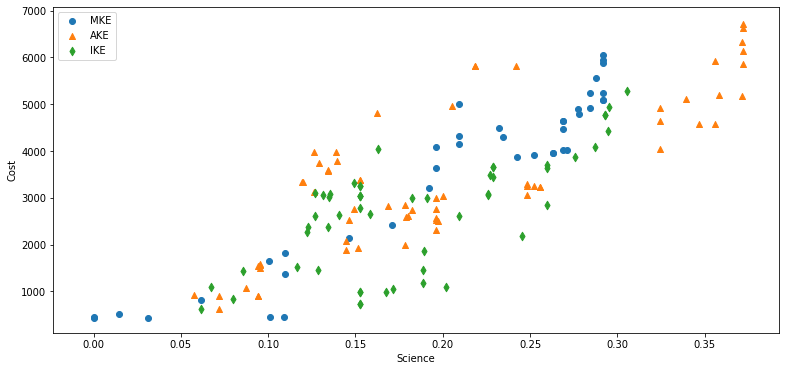

In [21]:
visualizer.designSynthesisScatter(markers=['o','^','d'])


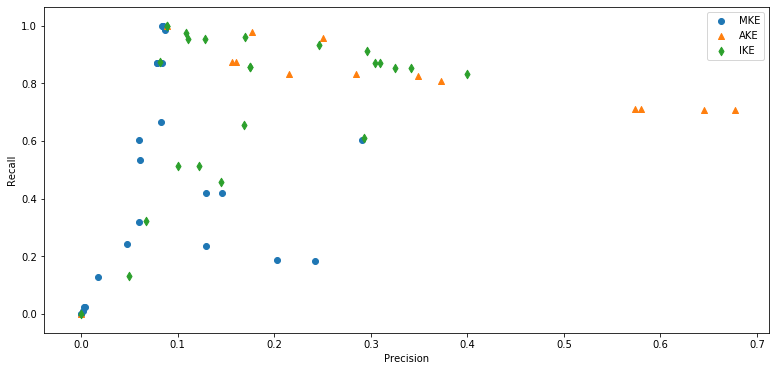

In [22]:
visualizer.featureSynthesisScatter(markers=['o','^','d'])


# Parallel coordinates

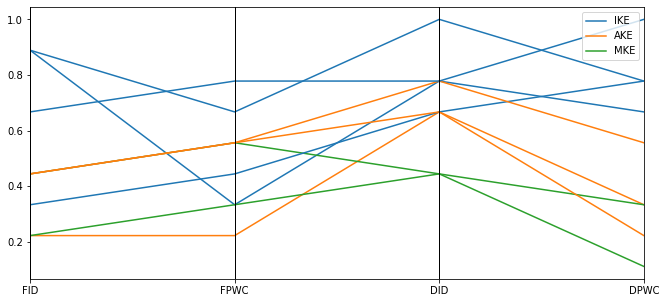

In [23]:
visualizer.parallelCoordinates(columns=['FID','FPWC','DID','DPWC'], 
                                figsize=(11,5))

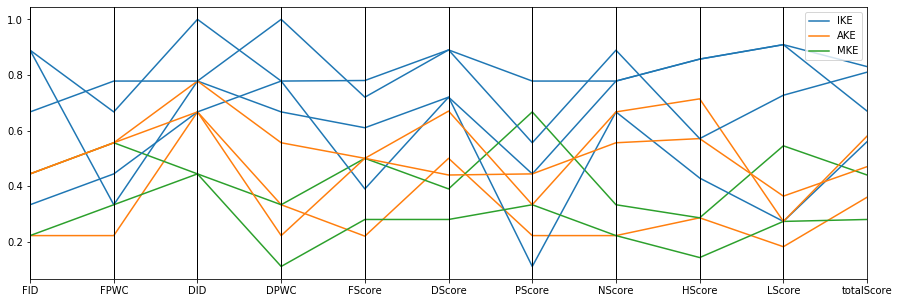

In [24]:
visualizer.parallelCoordinates(columns=['FID','FPWC','DID','DPWC','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5))

In [25]:
PROP_CYCLE = plt.rcParams['axes.prop_cycle']
COLORS = PROP_CYCLE.by_key()['color']

In [26]:
# tempVis = visualization.Visualizer(groups=[g3], groupNames=['IKE'])
# tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "IKE"]
# tempVis.setDataFrame(tempDF)
# tempVis.parallelCoordinates(columns=['FID','FPWC','DID','DPWC','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
#                                 figsize=(15,5))


In [27]:
# tempVis = visualization.Visualizer(groups=[g3], groupNames=['AKE'])
# tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "AKE"]
# tempVis.setDataFrame(tempDF)

# tempVis.parallelCoordinates(columns=['FID','FPWC','DID','DPWC','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
#                                 figsize=(15,5),
#                                 colors=[COLORS[1]])



In [28]:
# tempVis = visualization.Visualizer(groups=[g3], groupNames=['MKE'])
# tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "MKE"]
# tempVis.setDataFrame(tempDF)
# tempVis.parallelCoordinates(columns=['FID','FPWC','DID','DPWC','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
#                                 figsize=(15,5),
#                             colors=[COLORS[2]])


# Box plots

In [29]:
# visualizer.boxPlot(columns=['FScore','DScore', 'totalScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [30]:
# visualizer.boxPlot(columns=['PScore','NScore', 'FScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [31]:
# visualizer.boxPlot(columns=['HScore','LScore', 'FScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [32]:
# visualizer.boxPlot(columns=['meanDist2UP', 'meanIGD', 'totalScore'], nrows=1, ncols=3, sharey=False, figsize=(14,4.5))


(1, 2)
[[0.444, 0.222]]

(2,)
[[0.444, 0.222], [0.222, 0.444, 0.444]]

(3,)
[[0.444, 0.222], [0.222, 0.444, 0.444], [0.889, 0.333, 0.889, 0.667]]

(1, 2)
[[0.556, 0.333]]

(2,)
[[0.556, 0.333], [0.222, 0.556, 0.556]]

(3,)
[[0.556, 0.333], [0.222, 0.556, 0.556], [0.333, 0.444, 0.667, 0.778]]

(1, 2)
[[0.444, 0.444]]

(2,)
[[0.444, 0.444], [0.667, 0.667, 0.778]]

(3,)
[[0.444, 0.444], [0.667, 0.667, 0.778], [0.778, 0.667, 1.0, 0.778]]

(1, 2)
[[0.333, 0.111]]

(2,)
[[0.333, 0.111], [0.333, 0.222, 0.556]]

(3,)
[[0.333, 0.111], [0.333, 0.222, 0.556], [0.667, 0.778, 0.778, 1.0]]

(1, 2)
[[0.213, 0.0]]

(2,)
[[0.213, 0.0], [1.0, 0.846, 0.225]]

(3,)
[[0.213, 0.0], [1.0, 0.846, 0.225], [0.175, 0.61, 0.503, nan]]

(1, 2)
[[0.511, 0.213]]

(2,)
[[0.511, 0.213], [0.297, 0.0, 0.507]]

(3,)
[[0.511, 0.213], [0.297, 0.0, 0.507], [0.706, 1.0, 0.328, nan]]

(1, 2)
[[0.0, 0.056]]

(2,)
[[0.0, 0.056], [0.889, 0.833, 0.056]]

(3,)
[[0.0, 0.056], [0.889, 0.833, 0.056], [1.0, 0.722, 1.0, nan]]

(1, 2)


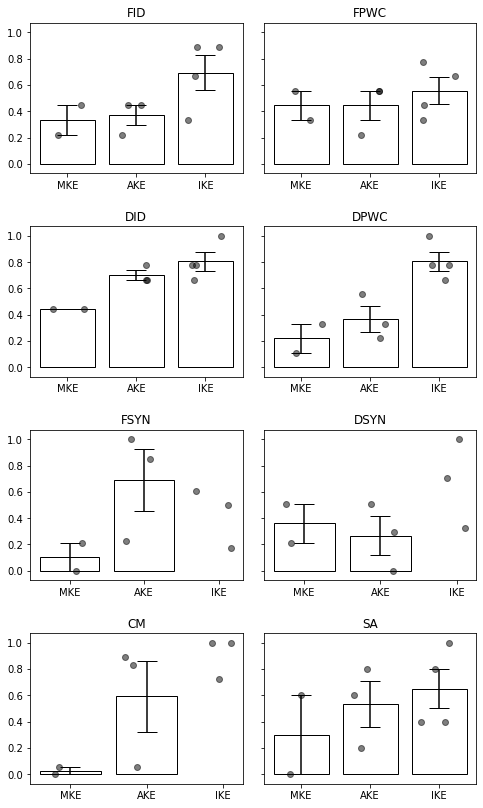

In [33]:
visualizer.barPlot(columns=['FID','FPWC','DID','DPWC','FSYN','DSYN','CM','SA'], 
                   showError=True, 
                   nrows=4, 
                   ncols=2, 
                   sharey=True, 
                   subplotsAdjust={"hspace":0.35, "wspace":0.1}, 
                   subplotsHide=None,
                   figsize=(8,14))


In [34]:
die here

SyntaxError: invalid syntax (<ipython-input-34-c985d6ba8f59>, line 1)

In [ ]:
visualizer.barPlot(columns=['FScore','DScore', 'TestScore'], 
                   showError=True, nrows=1, ncols=3, 
                   subplotsAdjust={"wspace":0.08}, 
                   sharey=True, figsize=(12,2.85))


In [ ]:
visualizer.barPlot(columns=['FID','FPWC','DID','DPWC'], showError=True, nrows=1, ncols=4, 
                   sharey=True, 
                   subplotsAdjust={"wspace":0.08}, 
                   figsize=(16,2.85))


In [ ]:
visualizer.barPlot(columns=['PScore','NScore','HScore','LScore'], 
                   showError=True, 
                   nrows=2, ncols=2, sharey=True, 
                   subplotsAdjust={"hspace":0.35, "wspace":0.08}, 
                   figsize=(8,6))

In [ ]:
# visualizer.barPlot(columns=['PScore','NScore', 'FScore'], showError=True, nrows=1, ncols=3, sharey=True, figsize=(13,3))

In [ ]:
# visualizer.barPlot(columns=['HScore','LScore', 'FScore'], showError=True, nrows=1, ncols=3, sharey=True, figsize=(13,3))

In [ ]:
visualizer.barPlot(dataFrame=df, columns=['selfAssessment', 'meanIGD', 'meanDist2UP', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))
# visualizer.barPlot(dataFrame=df, columns=['selfAssessmentExclude1', 'meanIGD', 'meanDist2UP', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


In [ ]:
visualizer.barPlot(dataFrame=df, columns=['normalizedIGD', 'adjustedIGD', 'entropy', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


In [ ]:
# visualizer.barPlot(dataFrame=df, columns=['HV', 'adjustedHV', 'selfAssessment', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


In [ ]:
visualizer.barPlot(dataFrame=df, columns=["numNodes","numEdges","numHighLevelEdges","totalScore"], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


# Box plots - Logged Data

In [ ]:
# df_lt = resultAnalyzer.getDataFrame(option="learningTask",columns=['totalScore'])
# visualizer.boxPlot(columns=['LT_numDesignViewed','LT_numFeatureViewed','totalScore'], dataFrame=df_lt, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))


In [ ]:
df_lt = resultAnalyzer.getDataFrame(option="learningTask", columns=["totalScore"])
visualizer.barPlot(columns=['LT_numDesignViewed','LT_numFeatureViewed','totalScore'], dataFrame=df_lt, showError=True, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))


In [ ]:
# df_fs = resultAnalyzer.getDataFrame(option="featureSynthesis")
# visualizer.boxPlot(columns=['meanDist2UP','FS_numFeatureViewed', 'FS_numFilterUsed','FS_numFeatureTested'], dataFrame=df_fs, nrows=1, ncols=4, sharey=False, figsize=(16,4))



In [ ]:
df_fs = resultAnalyzer.getDataFrame(option="featureSynthesis", invertSIB=False)
visualizer.barPlot(columns=['meanDist2UP','FS_numFeatureViewed', 'FS_numFilterUsed','FS_numFeatureTested'], dataFrame=df_fs, showError=True, nrows=1, ncols=4, sharey=False, figsize=(16,3.5))


In [ ]:
# df_ds = resultAnalyzer.getDataFrame(option="designSynthesis")
# visualizer.boxPlot(columns=['meanIGD','numDesigns', 'DS_numDesignViewed'], dataFrame=df_ds, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))



In [ ]:
df_ds = resultAnalyzer.getDataFrame(option="designSynthesis", invertSIB=False)
visualizer.barPlot(columns=['meanIGD','numDesigns', 'DS_numDesignViewed'], dataFrame=df_ds, showError=True, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))


# Statistical tests

In [ ]:
dfi = df.loc[df['condition'] == "IKE"]
dfa = df.loc[df['condition'] == "AKE"]
dfm = df.loc[df['condition'] == "MKE"]

In [ ]:
conditions = ["MKE", "AKE", "IKE"]
measures = ["FID","FPWC","DID","DPWC","FSYN","DSYN","CM","SA"]

out = []
for mea in measures:
    line = [mea]
    for cond in conditions:
        dat = None
        if cond == "MKE":
            dat = dfm
        elif cond == "AKE":
            dat = dfa
        elif cond == "IKE":
            dat = dfi
        
        mean = round(np.mean(dat[mea]),2)
        stdev = round(np.std(dat[mea]),2)
        temp = "{0} ({1})".format(mean, stdev)
        line.append(temp)
    
    out.append(" & ".join(line))

print(" \\\\\n".join(out))
print()

for mea in measures:
    t1, p1 = stats.ttest_ind(dfi[mea], dfa[mea])
    t2, p2 = stats.ttest_ind(dfi[mea], dfm[mea])
    t3, p3 = stats.ttest_ind(dfa[mea], dfm[mea])
    p1 = p1/2
    p2 = p2/2
    p3 = p3/2
    if p1  < 0.05:
        print("{0} IKE-AKE | p-val: {1}".format(mea, p1))
    if p2  < 0.05:
        print("{0} IKE-MKE | p-val: {1}".format(mea, p2))
    if p3  < 0.05:
        print("{0} AKE-MKE | p-val: {1}".format(mea, p3))

In [ ]:
conditions = ["MKE", "AKE", "IKE"]
measures = ["FScore","DScore","TestScore"]

out = []
for mea in measures:
    line = [mea]
    for cond in conditions:
        dat = None
        if cond == "MKE":
            dat = dfm
        elif cond == "AKE":
            dat = dfa
        elif cond == "IKE":
            dat = dfi
        
        mean = round(np.mean(dat[mea]),2)
        stdev = round(np.std(dat[mea]),2)
        temp = "{0} ({1})".format(mean, stdev)
        line.append(temp)
    
    out.append(" & ".join(line))

print(" \\\\\n".join(out))
print()

for mea in measures:
    t1, p1 = stats.ttest_ind(dfi[mea], dfa[mea])
    t2, p2 = stats.ttest_ind(dfi[mea], dfm[mea])
    t3, p3 = stats.ttest_ind(dfa[mea], dfm[mea])
    p1 = p1/2
    p2 = p2/2
    p3 = p3/2
    if p1  < 0.05:
        print("{0} IKE-AKE | p-val: {1}".format(mea, p1))
    if p2  < 0.05:
        print("{0} IKE-MKE | p-val: {1}".format(mea, p2))
    if p3  < 0.05:
        print("{0} AKE-MKE | p-val: {1}".format(mea, p3))

In [ ]:
conditions = ["MKE", "AKE", "IKE"]
measures = ["PScore","NScore","HScore","LScore"]

out = []
for mea in measures:
    line = [mea]
    for cond in conditions:
        dat = None
        if cond == "MKE":
            dat = dfm
        elif cond == "AKE":
            dat = dfa
        elif cond == "IKE":
            dat = dfi
        
        mean = round(np.mean(dat[mea]),2)
        stdev = round(np.std(dat[mea]),2)
        temp = "{0} ({1})".format(mean, stdev)
        line.append(temp)
    
    out.append(" & ".join(line))

print(" \\\\\n".join(out))
print()

for mea in measures:
    t1, p1 = stats.ttest_ind(dfi[mea], dfa[mea])
    t2, p2 = stats.ttest_ind(dfi[mea], dfm[mea])
    t3, p3 = stats.ttest_ind(dfa[mea], dfm[mea])
    p1 = p1/2
    p2 = p2/2
    p3 = p3/2
    if p1  < 0.05:
        print("{0} IKE-AKE | p-val: {1}".format(mea, p1))
    if p2  < 0.05:
        print("{0} IKE-MKE | p-val: {1}".format(mea, p2))
    if p3  < 0.05:
        print("{0} AKE-MKE | p-val: {1}".format(mea, p3))

In [ ]:
measures = ["FID","FPWC","DID","DPWC","FSYN","DSYN","SA"] + ["FScore","DScore","TestScore"] + ["PScore","NScore","HScore","LScore"]

for mea in measures:
    f,p = stats.f_oneway(dfi[mea], dfa[mea], dfm[mea])
    if p < 0.05:
        print("{0} | p-val: {1}".format(mea, p))

In [ ]:
# from sklearn.linear_model import LinearRegression

# # X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

# X = df[['condition','NScore']].values
# y = df['totalScore'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, y)  # perform linear regression


In [ ]:
# linear_regressor.score(X, y)

In [ ]:
# linear_regressor.coef_

In [ ]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# data = sm.datasets.get_rdataset("dietox", "geepack").data
# md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
# mdf = md.fit()
# print(mdf.summary())

# Survey results

In [ ]:
visualizer.featurePrefPlot(figsize=(10,18))

1
- Two radars should not be assigned to the same orbit
- Instruments {AERO_POL, CPR_RAD, SAR_ALTIM} are not assigned to the same orbit

2.
- Instruments that measure ocean color are not assigned to AM orbit
- AERO_LID, CPR_RAD are not assigned to SSO-600-DD orbit

3.
- Atmospheric chemistry instruments are assigned together in the same orbit
- HIRES_SOUND and HYP_IMAG are assigned together in the same orbit

4.
- SSO-800-DD is empty, except when it contains VEG_LID and/or SAR_ALTIM
- {OCE_SPEC, AERO_POL, AERO_LID, HYP_ERB, CPR_RAD, VEG_INSAR, CHEM_UVSPEC,CHEM_SWIRSPEC, HYP_IMAG, HIRES_SOUND} are not assigned to SSO-800-DD

5.
- VEG_INSAR is not used, except when it is assigned to LEO-600-polar
- HYP_ERB is not assigned to any of the orbits in the set {LEO-600-polar, SSO-600-AM, SSO-600-DD, SSO-800-DD}

6.
- Radars and lidars are not assigned to the same orbit, except when VEG_LID and VEG_INSAR are assigned together
- AERO_LID and CPR_RAD is not assigned together in the same orbit, and SAR_ALTIM and AERO_LID are not assigned together in the same orbit

7.
- AERO_POL and SAR_ALTIM are NOT assigned together in the same orbit
- CHEM_UVSPEC and HIRES_SOUND are assigned together in at least one of the orbits

8.
- OCE_SPEC is assigned to LEO-600-polar
- VEG_INSAR is NOT assigned to SSO-600-AM

9.
- AERO_LID is NOT used
- SAR_ALTIM is used

In [ ]:
visualizer.selfAssessmentPlot(displayStderr=True)

1. I learned a lot about the given design problem from this exercise
2. The features I learned from this exercise will be useful to solve a different (but similar)
design problem in the future
3. The tool was useful in checking hypotheses I had based on my prior knowledge
4. The tool was useful in checking new hypotheses I had as I analyzed the data.

0=strongly disagree, 1=disagree, 2=undecided, 3=agree, 4=strongly agree

# Get transcript comments

In [ ]:
subjects_manual = resultAnalyzer.filterSubjects(condition=4)
subjects_auto = resultAnalyzer.filterSubjects(condition=5)
subjects_interactive = resultAnalyzer.filterSubjects(condition=6)

In [ ]:
comments = resultAnalyzer.getComments(resultAnalyzer.subjects, "problem_solving_task", "F_cl_3", displayCondition=True, displayParticipantID=False, displayKeyword=False)

for line in comments:
    print(line)
    print("")
    

In [ ]:
resultAnalyzer.getComments(subjects_manual, "problem_solving_task", "F", displayParticipantID=False, displayKeyword=True)


In [ ]:
resultAnalyzer.getComments(subjects_auto, "problem_solving_task", "F_cl", displayParticipantID=False, displayKeyword=True)


In [ ]:
comments = resultAnalyzer.getComments(resultAnalyzer.subjects, "survey", "gen", displayCondition=True, displayParticipantID=False, displayKeyword=True)

for line in comments:
    print(line + "\n")

## Correlation 

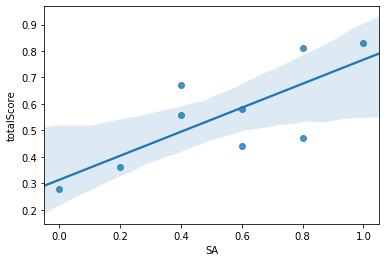

In [37]:
sns.regplot(x="SA", y="totalScore", data=df, ci=95)

In [38]:
mod = sm.OLS(np.array(df['SA']), np.array(df['totalScore']))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              65.45
Date:                Fri, 08 Nov 2019   Prob (F-statistic):                    4.03e-05
Time:                        15:05:36   Log-Likelihood:                          1.6405
No. Observations:                   9   AIC:                                     -1.281
Df Residuals:                       8   BIC:                                     -1.084
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/bang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [ ]:
sns.lmplot(x="selfAssessment", y="totalScore", hue="condition", markers=["o","x","^"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="totalScore", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [ ]:
# sns.lmplot(x="selfAssessment", y="totalScore", hue="type1", markers=["o","x"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="totalScore", hue="type", markers=["o","x"], data=df, ci=None);

## Correlation - Design synthesis task

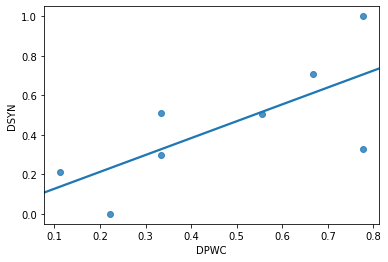

In [35]:
sns.regplot(x="DPWC", y="DSYN", data=df, ci=None);

In [36]:
xmod = sm.OLS(np.array(df['selfAssessment']), np.array(df['meanIGD']))
res = mod.fit()
print(res.summary())

MissingDataError: exog contains inf or nans

In [ ]:
sns.lmplot(x="selfAssessment", y="normalizedIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="normalizedIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [ ]:
# sns.lmplot(x="selfAssessment", y="normalizedIGD", hue="type1", markers=["o","x"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="normalizedIGD", hue="type", markers=["o","x"], data=df, ci=None);

In [ ]:
sns.lmplot(x="totalScore", y="meanIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);


In [ ]:
sns.regplot(x="selfAssessment", y="numDesigns", data=df, ci=None);

In [ ]:
sns.regplot(x="numDesigns", y="totalScore", data=df, ci=None);

In [ ]:
sns.regplot(x="numDesigns", y="normalizedIGD", data=df, ci=None);

In [ ]:
sns.regplot(x="numDesigns", y="selfAssessment", data=df, ci=None);

In [ ]:
sns.regplot(x="selfAssessment", y="adjustedIGD", data=df);

In [ ]:
sns.regplot(x="DScore", y="adjustedIGD", data=df);

In [ ]:
sns.regplot(x="DPWC", y="adjustedIGD", data=df);

## Correlation - feature synthesis task

In [ ]:
sns.regplot(x="selfAssessment", y="meanDist2UP", data=df);

In [ ]:
# sns.regplot(x="selfAssessmentExclude1", y="meanDist2UP", data=df);

In [ ]:
sns.lmplot(x="selfAssessment", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [ ]:
# sns.lmplot(x="selfAssessment", y="meanDist2UP", hue="type", markers=["o","x"], data=df, ci=None);
# sns.lmplot(x="selfAssessmentExclude1", y="meanDist2UP", hue="type", markers=["o","x"], data=df, ci=None);

In [ ]:
sns.lmplot(x="totalScore", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [ ]:
mod = sm.OLS(np.array(df['selfAssessment']), np.array(df['meanDist2UP']))
res = mod.fit()
print(res.summary())

# Correlation - concept mapping

In [ ]:
sns.regplot(x="numEdges", y="totalScore", data=df);

In [ ]:
sns.lmplot(x="numEdges", y="totalScore", hue="type2", markers=["o","x"], data=df, ci=None);


In [ ]:
mod = smf.ols(formula='totalScore ~ numEdges * C(type2)', data=df)
res = mod.fit()
print(res.summary())

In [ ]:
die here

# Etc

In [ ]:
df.columns

In [ ]:
sns.pairplot(df[['condition','FScore','DScore','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','PScore','NScore','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','FScore','normalizedDist2UP','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','DScore','adjustedIGD','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','numDesigns','selfAssessment','normalizedIGD']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','adjustedIGD','entropy','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','confFID','FID','selfAssessment']], kind="reg")

In [ ]:
die here

# Figures for learning measure comparison

In [ ]:
# index_implicit = dfRenamed[ dfRenamed["type"] == "implicit" ].index
# dfRenamed = dfRenamed.drop(index_implicit)

In [ ]:
dfm = df[['condition','FID','FPWC','FSYN','DID','DPWC','DSYN','CM','SA']].copy()

In [ ]:
dfconf = df[['condition','FID','confFID','FPWC','confFPWC','FSYN','DID','confDID','DPWC','confDPWC','DSYN','SA']].copy()


In [ ]:
dfm

In [ ]:
rPearson, pPearson, ciLoPearson, ciHiPearson = utils.calculate_pearsonr(dfm, decimal=2)

In [ ]:
rSpearman, pSpearman, ciLoSpearman, ciHiSpearman = utils.calculate_spearmanr(dfm, decimal=2)

In [ ]:
rPearson

In [ ]:
tempdf = rPearson
for rowname, row in tempdf.iterrows():
    out = [rowname]
    i = np.where(tempdf.columns.values == rowname)[0][0]
    for j, col in enumerate(row):
        if i == j:
            out.append("-")
        elif j > i:
            out.append("")
        else:    
            out.append(str(col))
    out = " & ".join(out) + " \\\\"
    print(out)

In [ ]:
pPearson / 2

In [ ]:
ciLoPearson

In [ ]:
ciHiPearson

In [ ]:
rSpearman

In [ ]:
pSpearman / 2

In [ ]:
ciLoSpearman

In [ ]:
ciHiSpearman

In [ ]:
from scipy.stats import pearsonr, spearmanr

print(pearsonr(dfconf["FID"],dfconf["confFID"]))
print(pearsonr(dfconf["FPWC"],dfconf["confFPWC"]))
print(pearsonr(dfconf["DID"],dfconf["confDID"]))
print(pearsonr(dfconf["DPWC"],dfconf["confDPWC"]))
print()

print(spearmanr(dfconf["FID"],dfconf["confFID"]))
print(spearmanr(dfconf["FPWC"],dfconf["confFPWC"]))
print(spearmanr(dfconf["DID"],dfconf["confDID"]))
print(spearmanr(dfconf["DPWC"],dfconf["confDPWC"]))

In [ ]:
sns.regplot(x="confFPWC", y="FPWC", data=dfconf, ci=95)

In [ ]:
rPearson

In [ ]:
x="CM"
y="SA"
sns.regplot(x=x, y=y, data=df, ci=95)
sns.lmplot(x=x, y=y, hue="condition", markers=["o","x","^"], data=df, ci=None)
sns.lmplot(x=x, y=y, hue="type1", markers=["o","x"], data=df, ci=None)
sns.lmplot(x=x, y=y, hue="type2", markers=["o","x"], data=df, ci=None)
sns.lmplot(x=x, y="totalScore", hue="type2", markers=["o","x"], data=df, ci=None)


In [ ]:
# corr = dfm.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 13))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .6})

In [ ]:
tempvis = visualization.Visualizer()
try:
    dfm["index"]
except:
    dfm["index"] = [i for i in range(len(dfm["condition"].values))]
tempvis.parallelCoordinates(columns=['FID','FPWC','FSYN','DID','DPWC','DSYN','CM','SA'], 
                                colors=None,
                                dataFrame=dfm,
                                grid=True,
                                figsize=(14,4), 
                                groupBy="index",
                                removeLegend=True,
                               alpha=0.9)

In [ ]:
tempvis = visualization.Visualizer()
tempvis.parallelCoordinates(columns=['FID','FPWC','DID','DPWC','SA'], dataFrame=dfm,
                                colors=["black"]*3,
                                grid=True,
                                figsize=(12,4), 
                                groupBy=None,
                               alpha=0.5)

In [ ]:
tempvis = visualization.Visualizer()
try:
    dfm["index"]
except:
    dfm["index"] = [i for i in range(len(dfm["condition"].values))]
tempvis.parallelCoordinateVariablePairs(varPairList=[
                                            ['FID','SA'],
                                            ['FPWC','SA'],
                                            ['DID','DPWC'],
                                            ['DPWC','DSYN'],
                                        ],
                                        colors=None,
                                        grid=True,
                                        groupBy="index",
                                        dataFrame=dfm,
                                        removeLegend=True,
                                        nrows=1, ncols=4, sharey=True, figsize=(15,3))


In [ ]:
tempvis = visualization.Visualizer()
try:
    dfconf["index"]
except:
    dfconf["index"] = [i for i in range(len(dfconf["condition"].values))]
tempvis.parallelCoordinateVariablePairs(varPairList=[
                                            ['confFID','FID'],
                                            ['confFPWC','FPWC'],
                                            ['confDID','DID'],
                                            ['confDPWC','DPWC'],
                                        ],
                                        colors=["black"]*3,
                                        grid=True,
                                        groupBy="index",
                                        dataFrame=dfconf,
                                        removeLegend=True,
                                        nrows=1, ncols=4, sharey=True, figsize=(15,3))


In [ ]:
df

In [ ]:
for s in resultAnalyzer.subjects:
    tempdata = s.learning_self_assessment_data
    out = "{0} {1} {2} {3}".format(tempdata[0],tempdata[1],tempdata[2],tempdata[3])
    print(out)